## Data

In [85]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
from sklearn.datasets import load_boston    # 506 samples, 13 feature

df = load_boston()
x = df.data
y = df.target
df

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [87]:
x[2]

array([2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9283e+02, 4.0300e+00])

## Feature Selection

In [88]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [89]:
# define feature selection
fs = SelectKBest(score_func = f_regression, k = 10)

In [90]:
# apply feature selection
x_selected = fs.fit_transform(x, y)
print(x_selected.shape)

(506, 10)


## Normalize Data

In [91]:
import joblib

In [92]:
from sklearn.preprocessing import MinMaxScaler
import joblib

In [93]:
scaler = MinMaxScaler(feature_range=(-1,1), copy=False)

In [94]:
x = scaler.fit_transform(x_selected)

In [95]:
joblib.dump(scaler, 'scaler.joblib') 

['scaler.joblib']

## Divide into Train and Test Data

In [96]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 87)

In [97]:
print("Size of data X train matrix %s"  % str(train_X.shape))
print("Size of data Y train array %s"  % str(train_y.shape))
print("Size of data X test matrix %s"  % str(test_X.shape))
print("Size of data Y test array %s"  % str(test_y.shape))

Size of data X train matrix (404, 10)
Size of data Y train array (404,)
Size of data X test matrix (102, 10)
Size of data Y test array (102,)


## Add bias

In [99]:
one_column_train = np.ones((train_X.shape[0], 1))
train_X_new = np.append(one_column_train, train_X, axis = 1) # Add bias

one_column_test = np.ones((test_X.shape[0], 1))
test_X_new = np.append(one_column_test, test_X, axis = 1)

In [100]:
print("Size of data X train matrix %s"  % str(train_X_new.shape))
print("Size of data Y train array %s"  % str(train_y.shape))
print("Size of data X test matrix %s"  % str(test_X_new.shape))
print("Size of data Y test array %s"  % str(test_y.shape))

Size of data X train matrix (404, 11)
Size of data Y train array (404,)
Size of data X test matrix (102, 11)
Size of data Y test array (102,)


## Build model

In [101]:
def np_cost_vectorized(w, X, y):
    '''
    Evaluate the cost function in a vectorized manner for 
    inputs `X` and targets `t`, at weights `w` and `b`.
    
    X: dataset matrix has (m, n) dimension. 
    y: targets vector has (n, ) dimension.
    w: weights vector has (n, ) dimension
    b: a scalar bias.
    
    Return a scalar cost value of `w`, `b`.
    '''
    
    m = X.shape[0] # number of samples in dataset
    w = np.array(w) # convert to numpy array
    y_hat = np.dot(X, w) # hypothesis
    
    return np.sum((y_hat - y)**2)/(2*m)

In [102]:
def np_grad_fn_vectorized(w, X, y):
    '''
    Given `w` - a current "Guess" of what our weights should be
          `X` - matrix of shape (m, n + 1) of input features
          `y` - target y values
    Return gradient of each weight evaluated at the current value
    '''
    
    #TODO: Complete the below followed the above expressions
    m, n = X.shape
    y_hat = np.dot(X, w)
    grad_w = np.dot(X.T, y_hat - y)/m
    
    return grad_w

In [103]:
def np_solve_via_gradient_descent(X, y, print_every=5000,
                                  niter=100000, alpha=0.005):
    '''
    Given `X` - matrix of shape (m, n+1) of input features
          `y` - target y values
    Solves for linear regression weights.
    Return weights after `niter` iterations.
    '''

    m, n = X.shape
    J_all = []

    # initialize all the weights to zeros
    w = np.zeros((n,))
    for k in range(niter):
        
        dw = np_grad_fn_vectorized(w, X, y) 
        w = w - alpha*dw
        J_all.append(np_cost_vectorized(w, X, y))

        if k % print_every == 0:
            print('Weight after %d iteration: %s' % (k, str(w)))
    return w, J_all

In [104]:
opt_w, J_all = np_solve_via_gradient_descent(train_X_new, train_y, niter=10000)

Weight after 0 iteration: [ 0.11068564 -0.10490539 -0.07774577 -0.03496202 -0.04104283  0.01160501
  0.02854537 -0.0386059  -0.02836748  0.01806617 -0.05628449]
Weight after 5000 iteration: [ 10.45902987  -7.83098211  -0.55359742  -0.60659697  -1.99213726
   8.89099703   1.48677296   2.76026889  -1.11241789  -5.08984604
 -10.7935953 ]


## Evaluate Model

In [105]:
def plot_cost(J_all, num_niter):
	plt.xlabel('Niter')
	plt.ylabel('Cost')
	plt.plot(num_niter, J_all, 'm', linewidth = "5")
	plt.show()

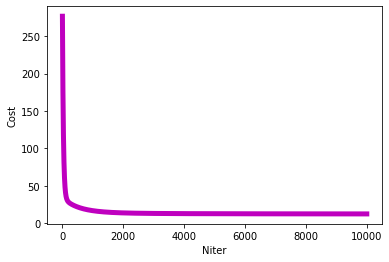

In [106]:
n_niter = []
jplot = []
count = 0
for i in range(len(J_all)):
	jplot.append(J_all[i])
	n_niter.append(count)
	count += 1
jplot = np.array(jplot)
n_niter = np.array(n_niter)
plot_cost(jplot, n_niter)

In [107]:
print("Training cost:", np_cost_vectorized(opt_w, train_X_new, train_y)) # Training cost: 12.449672904641005

Training cost: 12.449672904641005


In [108]:
print("Testing cost:", np_cost_vectorized(opt_w, test_X_new, test_y)) # Testing cost: 14.910843981138196

Testing cost: 14.910843981138196


In [110]:
def test(theta, x):
	x_arr = np.array(x)
	x_rs = x_arr.reshape(1, -1)
	scaler = joblib.load('scaler.joblib')
	x_norm = scaler.transform(x_rs)
	one_column = np.ones((x_norm.shape[0], 1))
	x_test = np.append(one_column, x_norm, axis = 1) # Add bias

	y = np.dot(x_test, theta)
	print("Price of house: ", y)

In [111]:
xtest = [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, 1.72839506e-01,
       6.94385898e-01, 5.99382080e-01, 4.34782609e-02, 1.04961832e-01,
       5.53191489e-01, 6.34657837e-02]

In [112]:
test(opt_w, xtest)

Price of house:  [29.72654451]
